# Visualização de dados para tomada de decisão

![](https://media.giphy.com/media/zw69pUViBZCZW/giphy.gif)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
%matplotlib inline

In [2]:
df = pd.read_csv('kaggle-survey-2017/multipleChoiceResponses.csv', encoding="ISO-8859-1")

/home/bahbbc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
exchange = pd.read_csv('kaggle-survey-2017/conversionRates.csv', encoding="ISO-8859-1", low_memory=False)

In [4]:
df = pd.merge(left=df, right=exchange, how='left', 
              left_on='CompensationCurrency', right_on='originCountry')

In [5]:
df.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity', 'Unnamed: 0', 'originCountry',
       'exchangeRate'],
      dtype='object', length=231)

In [6]:
df.shape

(16716, 231)

## Histogramas

Vamos analisar a idade dos cientistas de dados dessa pesquisa. Qual a idade média? Quantos anos tem a pessoa mais velha dessa pesquisa? 

Para conseguir usar o `countplot` vamos transformar `Age` para inteiro para poder enxergar os numeros melhor

In [7]:
df['Age'] = df['Age'].fillna(0).astype(int)

Vamos ver um histograma da idade dos participantes

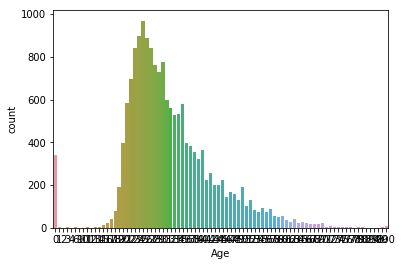

In [8]:
_ = sns.countplot(x = 'Age', data=df)

Ficou horrível...

Vamos adicionar o titulo e aumentar o gráfico

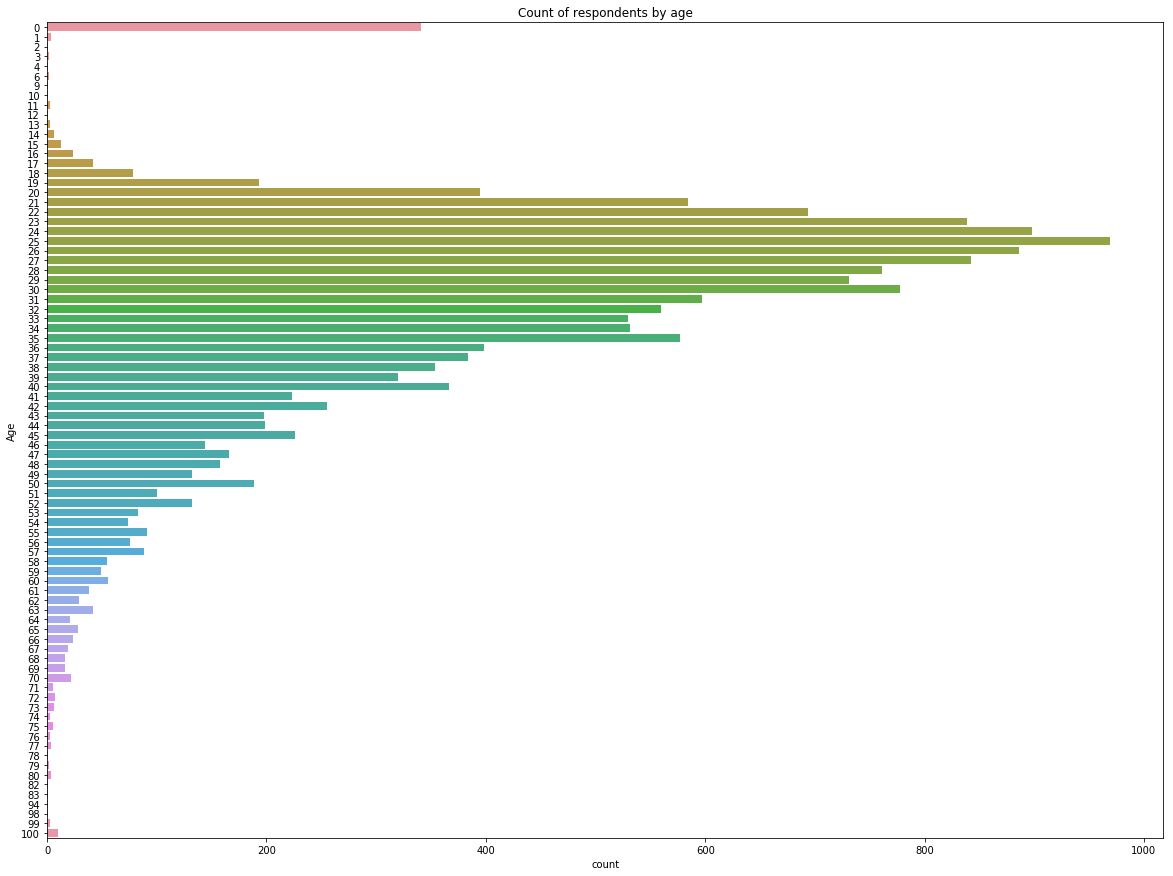

In [9]:
plt.subplots(figsize=(20,15))
plot = sns.countplot(y="Age", data=df).set_title("Count of respondents by age")

E se eu não quiser um eixo x mais limpo? Só para ver a distribuição em si?

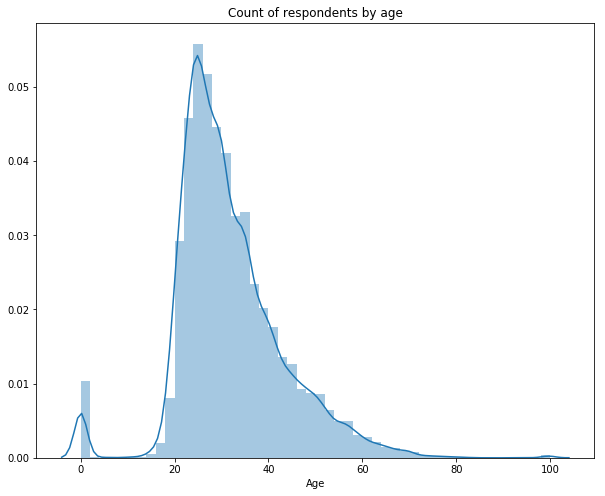

In [10]:
plt.subplots(figsize=(10,8))
_ = sns.distplot(df['Age']).set_title("Count of respondents by age")

E para remover a curva de tendencia?

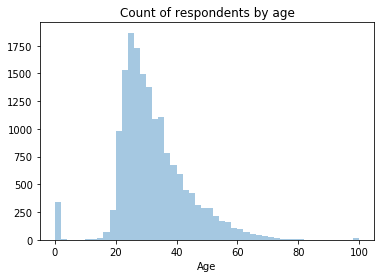

In [11]:
_ = sns.distplot(df['Age'], kde=False).set_title("Count of respondents by age")

**Nota**: Distplot não aceita Nulos. O grande número de pessoas que ficaram com idade zero na verdade são pessoas que não preencheram. 

### Desafio 1

Ao invés de substituir os valores nulos pelo número zero, substitua-os pelo valor médio da idade no dataset. Plot a idade novamente. Além disso, troque as cores do gráfico. Para isso use [o guia de paletas do seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial).

![monstros_sa](https://media.giphy.com/media/zxxXYJqTlpBnO/giphy.gif)

### Como seria o mesmo histograma usando apenas matplotlib?

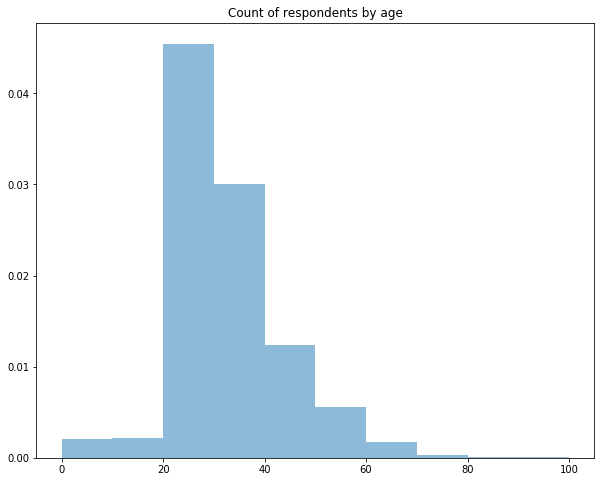

In [12]:
plt.subplots(figsize=(10,8))
_ = plt.hist(df['Age'], normed=True, alpha=0.5)
_ = plt.title("Count of respondents by age")

### Quais são as áreas de graduação dos cientistas de dados?

Text(0.5,1,'Count of respondents by major')

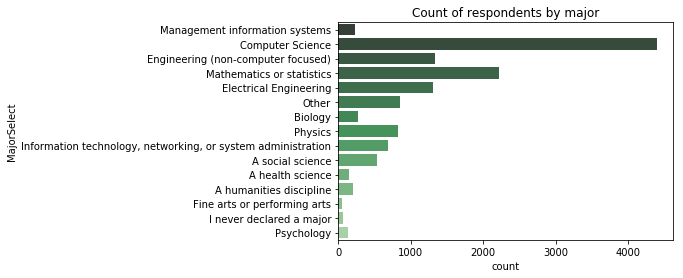

In [13]:
sns.countplot(y="MajorSelect", data=df, palette="Greens_d").set_title("Count of respondents by major")

Para ficar mais facil de ver podemos ordenar as barras

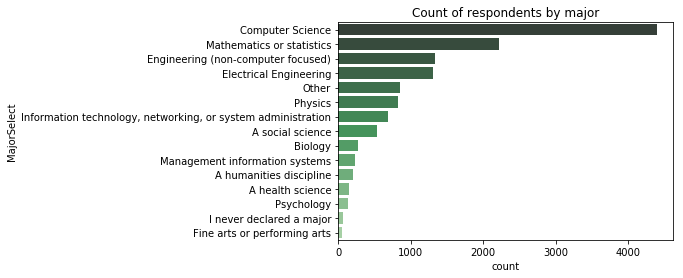

In [14]:
_ = sns.countplot(y="MajorSelect", data=df, palette="Greens_d", order=df['MajorSelect'].value_counts().index) \
.set_title("Count of respondents by major")

Agora ficou bem mais fácil de tirar conclusões sobre os cursos.

A maioria dos cientistas de dados estudou ciência da computação, matemática ou engenharia.

E se trocarmos os y por um x?

### Qual o maior grau de educação dos cientistas de dados?

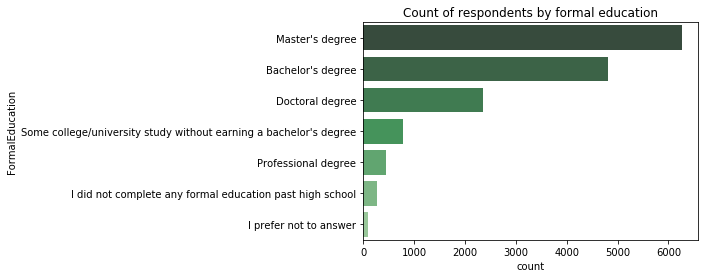

In [15]:
_ = sns.countplot(y="FormalEducation", data=df, palette="Greens_d", order=df['FormalEducation'].value_counts().index) \
.set_title("Count of respondents by formal education")

### Desafio 2
##### Quais os empregos anteriores dos cientistas de dados?

Para fazer esse desafio você vai consultar a coluna `PastJobTitlesSelect`. Veja que essa coluna possui varios valores. Você precisará criar um método para reduzir a granularidade dessa coluna.

Dica: A solução fica mais fácil se você usar [expressões regulares](https://pt.wikipedia.org/wiki/Express%C3%A3o_regular). Para testá-las use [esse site](https://regexr.com/)

![finn_mathematical](https://media.giphy.com/media/ccQ8MSKkjHE2c/giphy.gif)

In [16]:
df['PastJobTitlesSelect'].value_counts()

I haven't started working yet                                                                                                                                                                                            1454
Other                                                                                                                                                                                                                    1043
Researcher                                                                                                                                                                                                                786
Software Developer/Software Engineer                                                                                                                                                                                      784
Engineer                                                                                                        

In [17]:
df['PastJobTitlesSelect'] = df['PastJobTitlesSelect'].fillna('NULL')

In [18]:
past_job_category = []
for s in df['PastJobTitlesSelect']:
    past_job_category.append(re.sub(r'(?=,).*', '', s))
    
df['new_job_category'] = past_job_category

In [19]:
df[['PastJobTitlesSelect', 'new_job_category']].head(5)

,PastJobTitlesSelect,new_job_category
0,"Predictive Modeler,Programmer,Researcher",Predictive Modeler
1,Software Developer/Software Engineer,Software Developer/Software Engineer
2,"Data Scientist,Machine Learning Engineer",Data Scientist
3,"Business Analyst,Operations Research Practitio...",Business Analyst
4,"Computer Scientist,Data Analyst,Data Miner,Dat...",Computer Scientist


In [20]:
df['new_job_category'].value_counts()

NULL                                    2524
Business Analyst                        2338
Data Analyst                            1806
I haven't started working yet           1454
Engineer                                1302
Computer Scientist                      1232
Researcher                              1125
Other                                   1083
Programmer                              1002
Data Scientist                           935
Software Developer/Software Engineer     861
DBA/Database Engineer                    326
Data Miner                               212
Machine Learning Engineer                202
Statistician                             146
Predictive Modeler                        85
Operations Research Practitioner          83
Name: new_job_category, dtype: int64

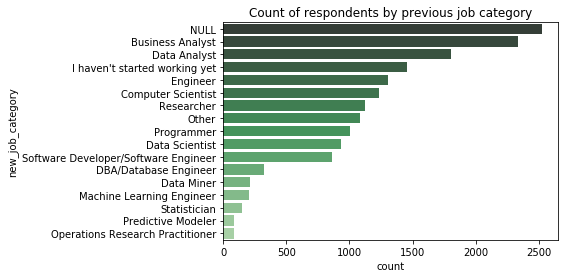

In [21]:
_ = sns.countplot(y="new_job_category", data=df, palette="Greens_d", order=df['new_job_category'].value_counts().index) \
.set_title("Count of respondents by previous job category")

### Será que o trabalho remoto impacta no tempo que um cientista passa coletando dados?

In [22]:
df['RemoteWork'].value_counts()

Sometimes           2440
Rarely              1772
Never                823
Most of the time     684
Always               352
Don't know            26
Name: RemoteWork, dtype: int64

In [23]:
df['TimeGatheringData'].value_counts()

30.0     1070
50.0     1054
20.0      985
40.0      967
10.0      610
60.0      603
0.0       464
70.0      347
25.0      258
80.0      187
35.0      174
15.0      153
5.0       144
45.0       96
65.0       82
55.0       65
75.0       63
90.0       61
100.0      34
85.0       16
1.0         7
95.0        6
2.0         6
33.0        5
3.0         4
8.0         4
7.0         4
12.0        3
28.0        3
34.0        3
         ... 
53.0        2
78.0        2
22.0        2
72.0        2
6.0         2
49.0        2
66.0        2
56.0        1
64.0        1
16.0        1
4.0         1
59.0        1
42.0        1
24.0        1
77.0        1
92.0        1
13.0        1
39.0        1
36.0        1
17.0        1
9.0         1
94.0        1
47.0        1
87.0        1
23.0        1
44.0        1
73.0        1
29.0        1
31.0        1
11.0        1
Name: TimeGatheringData, Length: 67, dtype: int64

In [24]:
df['TimeGatheringData'] = df['TimeGatheringData'].fillna(-1)

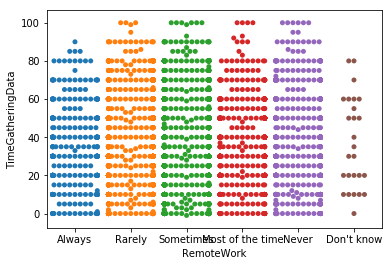

In [25]:
sns.swarmplot(x="RemoteWork", y="TimeGatheringData", data=df)

Parece que não muda muito... 

### E se eu quiser saber se o tempo que a pessoa passa gerando visualizações impacta no tempo que ela gasta em visualização em um projeto?

In [26]:
df['WorkToolsSelect'].value_counts()

Python,R                                                                                                                                                                                                                                                                                                      125
R                                                                                                                                                                                                                                                                                                             123
Python                                                                                                                                                                                                                                                                                                        118
Python,R,SQL                                                                      

In [27]:
df['WorkDataVisualizations'] = df['WorkDataVisualizations'].fillna('NULL')
work_visualization = []
for s in df['WorkDataVisualizations']:
    work_visualization.append(re.sub(' of projects', '', s))
    
df['work_visualization'] = work_visualization

In [28]:
df['work_visualization'].value_counts()

NULL             9837
10-25%           1265
76-99%           1255
100%             1253
51-75%           1160
26-50%            918
Less than 10%     868
None              160
Name: work_visualization, dtype: int64

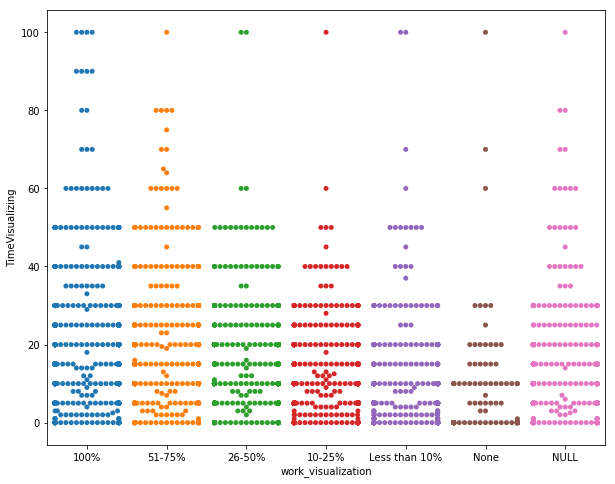

In [29]:
plt.subplots(figsize=(10,8))
sns.swarmplot(x="work_visualization", y="TimeVisualizing", data=df, 
              order=['100%', '51-75%', '26-50%', '10-25%', 'Less than 10%', 'None', 'NULL'])

### Desafio 3

Fazer um Heatmap mostrando a [correlação](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) dos tempos das etapas de um projeto de Data Science. 

São elas:

 - TimeGatheringData
 - TimeVisualizing
 - TimeModelBuilding
 - TimeFindingInsights
 - TimeProduction

Siga os passos [desse tutorial](https://seaborn.pydata.org/examples/many_pairwise_correlations.html). Atenção! Use apenas essas variáveis.

![crazy_finn](https://media.giphy.com/media/KI9oNS4JBemyI/giphy.gif)

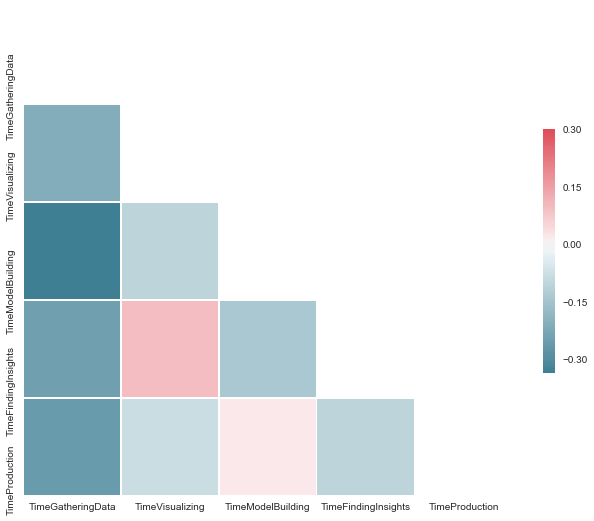

In [30]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = df[['TimeGatheringData', 'TimeVisualizing', 'TimeModelBuilding', 'TimeFindingInsights', 'TimeProduction']]
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### E se eu quiser ter uma ideia do tempo que é investido criando-se modelos?

## Boxplot

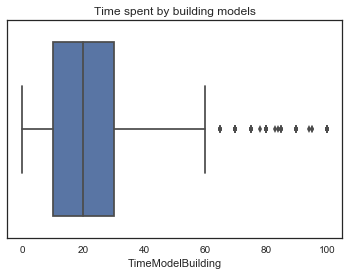

In [31]:
_ = sns.boxplot(df['TimeModelBuilding']).set_title("Time spent by building models")

Eu também posso usar boxplots com variáveis categóricas...

### E Se eu quiser verificar o salário das pessoas por gênero?

Primeiramente, vamos usar apenas as pessoas que tenham valores de salário que é representado pela variável `CompensationAmount`

In [32]:
money_index = df['CompensationAmount'].notnull()
compensation_check = df[money_index]

In [33]:
df.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,Unnamed: 0,exchangeRate
count,16716.000000,13109.000000,13126.000000,13111.000000,13122.000000,13126.000000,13094.000000,16716.000000,7528.000000,7517.000000,7529.000000,7523.000000,7513.000000,4529.000000,4529.000000
mean,31.731814,33.366771,27.375514,15.217593,16.988607,5.531434,1.795940,15.732472,21.268066,10.806372,13.869372,13.094776,2.396247,7.075293,0.703953
std,11.307691,25.787181,26.860840,18.996778,23.676917,11.072680,9.357886,23.509335,16.165958,12.257932,11.722945,12.974846,12.157137,11.333361,0.486712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000030
25%,25.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,10.000000,0.000000,5.000000,5.000000,0.000000,1.000000,0.058444
50%,30.000000,30.000000,20.000000,10.000000,5.000000,0.000000,0.000000,-1.000000,20.000000,10.000000,10.000000,10.000000,0.000000,2.000000,1.000000
75%,37.000000,50.000000,40.000000,25.000000,30.000000,10.000000,0.000000,30.000000,30.000000,15.000000,20.000000,20.000000,0.000000,7.000000,1.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,86.000000,2.652053


In [34]:
compensation_check['GenderSelect'].value_counts()

Male                                                 4432
Female                                                725
A different identity                                   32
Non-binary, genderqueer, or gender non-conforming      29
Name: GenderSelect, dtype: int64

In [35]:
df['exchangeRate'] = df['exchangeRate'].fillna(0)
df['CompensationAmount'] = df['CompensationAmount'].fillna(0)

In [36]:
df['CompensationAmount'] = df.CompensationAmount.apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0))
                                                       else float(x.replace(',',''))) 
df['CompensationAmount'] = df['CompensationAmount']*df['exchangeRate']
df = df[df['CompensationAmount']>0]

In [37]:
df['CompensationAmount'].describe()

count    4.333000e+03
mean     6.651893e+06
std      4.298948e+08
min      6.000000e-02
25%      2.152487e+04
50%      5.390140e+04
75%      9.627720e+04
max      2.829740e+10
Name: CompensationAmount, dtype: float64

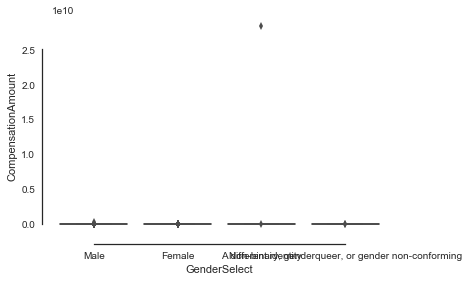

In [38]:
sns.boxplot(x="GenderSelect", y="CompensationAmount",
            data=df)
sns.despine(offset=10, trim=True)

Tem um outlier nesse conj. de dados que está atrapalhando a nossa visualização... Podemos removê-lo usando boolean indexes. Vamos usar pessoas que ganham até 2000000.

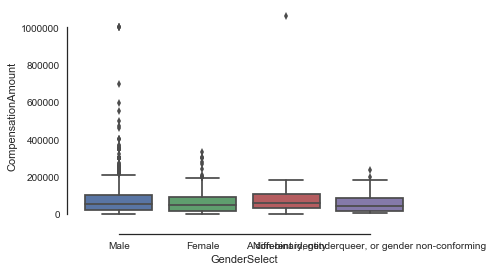

In [39]:
sns.boxplot(x="GenderSelect", y="CompensationAmount",
            data=df[df['CompensationAmount'] < 2000000])
sns.despine(offset=10, trim=True)

Agora vamos colocar os titulos em 45º

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

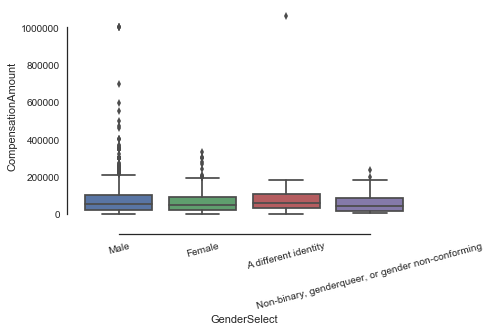

In [40]:
sns.boxplot(x="GenderSelect", y="CompensationAmount",
            data=df[df['CompensationAmount'] < 2000000])
sns.despine(offset=10, trim=True)
plt.xticks(rotation=15)

## Scatterplots (Dispersão)

### E se eu quiser ver a distribuição da probabilidade das pessoas que aprenderam algo (da profissão) no Trabalho e que foram auto didatas? 

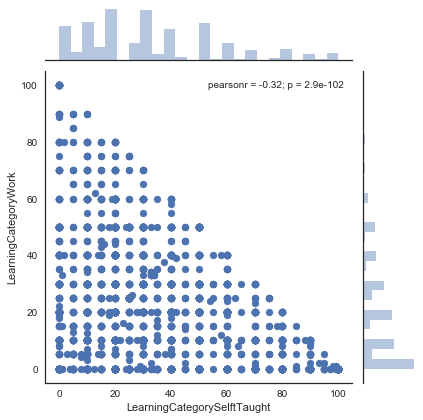

In [41]:
sns.jointplot(x="LearningCategorySelftTaught", y="LearningCategoryWork", data=df);

E o que eu posso fazer se eu quiser ver as probabilidades de todas as categorias `LearningCategory(...)` todas juntas?

/home/bahbbc/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/home/bahbbc/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


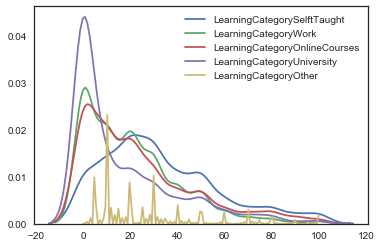

In [42]:
sns.kdeplot(df['LearningCategorySelftTaught'])
sns.kdeplot(df['LearningCategoryWork'])
sns.kdeplot(df['LearningCategoryOnlineCourses'])
sns.kdeplot(df['LearningCategoryUniversity'])
#sns.kdeplot(df['LearningCategoryKaggle'])
sns.kdeplot(df['LearningCategoryOther'])
plt.legend();

## Desafio 4

Existem ainda várias perguntas que ficaram sem resposta, do tipo:

 1. Quais os maiores desafios de um cientista de dados? (`WorkChallengesSelect`)
 - Quais os algoritmos mais utilizados em data science? (`WorkAlgorithmsSelect`)
 - Quais os setores que mais empregam cientistas de dados? (`EmployerIndustry`)
 - Qual o tamanho das empresas que contratam cientistas de dados? (`EmployerSize`)
 
Organizem-se em duplas para resolver esses desafios.

![challenge](https://media.giphy.com/media/d4zHnLjdy48Cc/giphy.gif)

## Gráficos mais complexos

 - Uma das análises desse dataset no blog do kaggle -> http://blog.kaggle.com/2017/10/30/introducing-kaggles-state-of-data-science-machine-learning-report-2017/
 - Joyplots -> http://blog.kaggle.com/2017/07/20/joyplots-tutorial-with-insect-data/
 - Plots de mapas -> http://blog.kaggle.com/2016/11/30/seventeen-ways-to-map-data-in-kaggle-kernels/